In [952]:
import pandas as pd
import numpy as np
import os

In [953]:
os.chdir("C:\\Users\shafagh\OneDrive - Falling Colors Technology\onboarding\Falling colors project\data and instruction")


In [954]:
os.getcwd()

'C:\\Users\\shafagh\\OneDrive - Falling Colors Technology\\onboarding\\Falling colors project\\data and instruction'

In [955]:
df_ClientData = pd.read_excel (r'C:\Users\shafagh\OneDrive - Falling Colors Technology\onboarding\Falling colors project\data and instruction\Practical_ClientData.xlsx')
df_ServiceData = pd.read_excel (r'C:\Users\shafagh\OneDrive - Falling Colors Technology\onboarding\Falling colors project\data and instruction\Practical_ServiceData.xlsx')
df_SurveyData = pd.read_excel (r'C:\Users\shafagh\OneDrive - Falling Colors Technology\onboarding\Falling colors project\data and instruction\Practical_SurveyData.xlsx')

In [956]:
df_SurveyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     31647 non-null  int64         
 1   ClientId                       31647 non-null  object        
 2   SurveyDate                     31647 non-null  datetime64[ns]
 3   SurveyNumber                   31647 non-null  int64         
 4   InterviewIntake                31647 non-null  object        
 5   DOB                            31647 non-null  datetime64[ns]
 6   Gender                         31644 non-null  object        
 7   Ethnicity                      31499 non-null  object        
 8   Ethnorace                      22445 non-null  object        
 9   Veteran                        10031 non-null  object        
 10  C1LivingSituationId            31647 non-null  object        
 11  D2EducationLeve

# Checking for Missing Values

In [957]:
df_ClientData.isnull().values.any()

True

In [958]:
df_ClientData.isnull().sum()

Unnamed: 0       0
ClientId         0
City          6888
State         6879
Zip           6882
dtype: int64

In [959]:
df_ServiceData.isnull().values.any()

False

In [960]:
df_SurveyData.isnull().values.any()

True

### Checking Missing values in target variables

In [961]:
target_columns = ['D2EducationLevelId','B1aAlcohol','E1TimesArrested','D3EmploymentSituationId','E4CommitedCrime','F5aDepression','F5bAnxiety','C2AddictionStressProblemId', 'C1LivingSituationId','B1cIllegalDrugs']
df_SurveyData[target_columns] = df_SurveyData[target_columns].fillna('missing')
for target in target_columns:
    print(df_SurveyData[target].value_counts())

12         12032
13          3913
14          3678
11          3138
10          1950
16          1615
9           1499
15          1045
8            792
18           542
6            393
17           241
7            229
-7           159
Missing      145
-8           103
5             59
0             39
4             34
3             23
2             12
1              6
Name: D2EducationLevelId, dtype: int64
0          23818
1           1605
2           1211
3            641
5            604
4            501
30           479
10           428
15           404
20           364
7            233
8            209
6            186
25           151
12           114
Missing      103
14            82
-7            78
21            65
-8            49
28            46
16            35
9             27
18            26
23            26
27            24
13            20
22            20
24            20
11            19
19            16
26            16
17            14
29            13
Name: B1a

> The number of missing/NA columns are very small. At this point we remove them. But, in a rigorous study we might need to impute them since we might be having response bias.

In [962]:
# replacing non-applicables in Target variables
not_applicables = [-1,-7, -8, -9, 'Missing']
df_SurveyData.where((~df_SurveyData['E1TimesArrested'].isin(not_applicables)) &
                    (~df_SurveyData['D2EducationLevelId'].isin(not_applicables)) &
                    (~df_SurveyData['E4CommitedCrime'].isin(not_applicables))&
                    (~df_SurveyData['F5aDepression'].isin(not_applicables))&
                    (~df_SurveyData['F5bAnxiety'].isin(not_applicables))&
                    (~df_SurveyData['C2AddictionStressProblemId'].isin(not_applicables))&
                    (~df_SurveyData['C1LivingSituationId'].isin(not_applicables)) &
                    (~df_SurveyData['B1cIllegalDrugs'].isin(not_applicables))&
                   (~df_SurveyData['B1aAlcohol'].isin(not_applicables)) &
                   (~df_SurveyData['D3EmploymentSituationId'].isin(not_applicables)),
                   inplace=True)

In [963]:
target_columns = ['D2EducationLevelId','B1aAlcohol','E1TimesArrested','D3EmploymentSituationId','E4CommitedCrime','F5aDepression','F5bAnxiety','C2AddictionStressProblemId', 'C1LivingSituationId','B1cIllegalDrugs']
for target in target_columns:
    print(df_SurveyData[target].value_counts())

12    11735
13     3813
14     3550
11     3073
10     1911
16     1553
9      1464
15     1013
8       774
18      502
6       388
17      229
7       223
5        57
4        31
0        30
3        23
2        12
1         6
Name: D2EducationLevelId, dtype: int64
0     23151
1      1532
2      1151
3       610
5       583
4       477
30      442
10      409
15      384
20      338
7       223
8       199
6       182
25      149
12      108
14       77
21       63
28       44
16       33
23       26
9        25
18       25
27       23
24       20
22       19
13       19
11       18
26       16
19       16
17       14
29       11
Name: B1aAlcohol, dtype: int64
0     28654
1      1653
2        52
3        17
30        4
9         2
34        1
14        1
10        1
7         1
6         1
Name: E1TimesArrested, dtype: int64
3    9235
1    7911
2    5297
4    3590
7    3025
0     918
6     283
5     128
Name: D3EmploymentSituationId, dtype: int64
0      25719
1       1138
30       799

In [964]:
df_SurveyData['E1TimesArrested'].value_counts()

0     28654
1      1653
2        52
3        17
30        4
9         2
34        1
14        1
10        1
7         1
6         1
Name: E1TimesArrested, dtype: int64

### Checking missing values in independant variables

In [965]:
df_SurveyData.isnull().sum()

Unnamed: 0                        1260
ClientId                          1260
SurveyDate                        1260
SurveyNumber                      1260
InterviewIntake                   1260
DOB                               1260
Gender                            1261
Ethnicity                         1397
Ethnorace                        10091
Veteran                          21852
C1LivingSituationId               1260
D2EducationLevelId                1260
D3EmploymentSituationId           1260
B1aAlcohol                        1260
B1cIllegalDrugs                   1260
C2AddictionStressProblemId        1260
C4AddictionEmotionalProblemId     1260
E1TimesArrested                   1260
E4CommitedCrime                   1260
F5aDepression                     1260
F5bAnxiety                        1260
dtype: int64

In [966]:
eth = df_SurveyData[['Veteran','B1cIllegalDrugs']].copy()
eth['Veteran_missing'] = eth['Veteran'].isnull()
eth['B1cIllegalDrugs'] = eth['B1cIllegalDrugs'].astype(float)


In [967]:
eth['Veteran_missing'] 

0         True
1         True
2         True
3         True
4         True
         ...  
31642    False
31643    False
31644    False
31645    False
31646    False
Name: Veteran_missing, Length: 31647, dtype: bool

In [968]:
eth.groupby('Veteran_missing').B1cIllegalDrugs.agg(['mean','count','sem'])

,mean,count,sem
Veteran_missing,,,
False,1.988668,9795,0.064463
True,1.936869,20592,0.043614


It seems missing values on veterans have some different charactereistics at least on one target variable of interest (though ttest might results in p>0.05 as the standard error is too big). We will keep it as an 'unknown' catergoy as it might help with our model later on and there is no explicit reason to drop these missing values as they are around 60% of total number of rows.

In [969]:
df_SurveyData['Veteran']= df_SurveyData['Veteran'].fillna('unknwon')

In [970]:
eth = df_SurveyData[['Ethnorace','B1cIllegalDrugs']].copy()
eth['Ethnorace_missing'] = eth['Ethnorace'].isnull()
eth['B1cIllegalDrugs'] = eth['B1cIllegalDrugs'].astype(float)
eth.groupby('Ethnorace_missing').B1cIllegalDrugs.agg(['mean','count','sem'])

,mean,count,sem
Ethnorace_missing,,,
False,1.915662,21556,0.042399
True,2.046088,8831,0.068869


Similarly we will keep this column missing values. But we will drop the rest of the columns missing value since their size is too small.

In [971]:
df_SurveyData['Ethnorace']= df_SurveyData['Ethnorace'].fillna('unknwon')

In [972]:
df_SurveyData.isnull().values.any()

True

In [973]:
df_SurveyData.isnull().sum()

Unnamed: 0                       1260
ClientId                         1260
SurveyDate                       1260
SurveyNumber                     1260
InterviewIntake                  1260
DOB                              1260
Gender                           1261
Ethnicity                        1397
Ethnorace                           0
Veteran                             0
C1LivingSituationId              1260
D2EducationLevelId               1260
D3EmploymentSituationId          1260
B1aAlcohol                       1260
B1cIllegalDrugs                  1260
C2AddictionStressProblemId       1260
C4AddictionEmotionalProblemId    1260
E1TimesArrested                  1260
E4CommitedCrime                  1260
F5aDepression                    1260
F5bAnxiety                       1260
dtype: int64

# Making client demographic dataset 
### first I removed the non-demographic column in Surveydata and then merge the new dataframe with client data


### Removing the duplicate row in Surveydata and then removing the non-demographic column

In [974]:
df=df_SurveyData.drop(['SurveyDate','SurveyNumber','InterviewIntake','C1LivingSituationId', 'D3EmploymentSituationId', 'D3EmploymentSituationId','B1aAlcohol','B1cIllegalDrugs','C2AddictionStressProblemId','C4AddictionEmotionalProblemId','E1TimesArrested','E4CommitedCrime','F5aDepression','F5bAnxiety'], axis=1)

In [975]:
df= df.drop_duplicates(subset=['ClientId'], keep='last')


In [976]:
df.head()

,Unnamed: 0,ClientId,DOB,Gender,Ethnicity,Ethnorace,Veteran,D2EducationLevelId
1,13.0,37640,1992-01-14,Female,Hispanic or Latino,Hispanic,unknwon,12
3,17.0,37648,1984-12-15,Female,Not Hispanic or Latino,White,unknwon,10
5,19.0,37657,1970-01-14,Female,Not Hispanic or Latino,White,unknwon,12
9,29.0,37690,1992-07-15,Male,Hispanic or Latino,unknwon,unknwon,12
11,31.0,37692,1958-08-14,Female,Hispanic or Latino,unknwon,unknwon,11


In [977]:
len(df['ClientId'])

11198

In [978]:
len(df_ClientData)

47337

### Merging Surveydata & Client data

In [979]:
ClientDemographic_Data = pd.merge(df, df_ClientData, on="ClientId",how='left')


In [980]:
ClientDemographic_Data.head()

,Unnamed: 0_x,ClientId,DOB,Gender,Ethnicity,Ethnorace,Veteran,D2EducationLevelId,Unnamed: 0_y,City,State,Zip
0,13.0,37640,1992-01-14,Female,Hispanic or Latino,Hispanic,unknwon,12,15.0,Bloomfield,NM,87413
1,17.0,37648,1984-12-15,Female,Not Hispanic or Latino,White,unknwon,10,18.0,Aztec,NM,87410
2,19.0,37657,1970-01-14,Female,Not Hispanic or Latino,White,unknwon,12,20.0,Alamogordo,NM,88310
3,29.0,37690,1992-07-15,Male,Hispanic or Latino,unknwon,unknwon,12,27.0,Albuquerque,NM,87151
4,31.0,37692,1958-08-14,Female,Hispanic or Latino,unknwon,unknwon,11,29.0,Alamogordo,NM,88310


In [981]:
len(ClientDemographic_Data['ClientId'])

11198

# Cleaning Service dataset

In [982]:
df_ServiceData.head()

,Unnamed: 0,ClientID,ProviderId,ServiceDt,ServiceAmt,Service,ServiceDesc
0,1,38825,011P00000000000,2013-04-08,60.0,Massage,"Massage, Shiatsu, Acupressure, Rolfing, Felden..."
1,4,39852,017P00000000000,2013-06-11,3.0,Bus Pass Fee,Bus Pass - Fee
2,5,39852,017P00000000000,2013-06-11,10.0,Transportation - Bus pass,Providing means for individual to be transferr...
3,8,39852,017P00000000000,2013-06-14,60.0,Acupuncture,Acupuncture
4,10,39852,017P00000000000,2013-06-18,60.0,Acupuncture,Acupuncture


In [983]:
newdf_ServiceData=df_ServiceData.drop(['ProviderId','ServiceDt','ServiceDesc'], axis=1)
newdf_ServiceData = newdf_ServiceData.assign(ServiceNum=1)

newdf_ServiceData.head()

,Unnamed: 0,ClientID,ServiceAmt,Service,ServiceNum
0,1,38825,60.0,Massage,1
1,4,39852,3.0,Bus Pass Fee,1
2,5,39852,10.0,Transportation - Bus pass,1
3,8,39852,60.0,Acupuncture,1
4,10,39852,60.0,Acupuncture,1


### Two new column, was created based on value of ServiceAmt, ServiceNum
### Column ServiceAmt sum is the sum of Service Amount and the column ServiceNum Total is the total number of service

In [984]:
newdf_ServiceData=newdf_ServiceData.groupby('ClientID').agg({'ServiceAmt': 'sum', 'ServiceNum':'count'}).reset_index().rename(columns={'ServiceAmt':'ServiceAmt sum', 'ServiceNum': 'ServiceNum Total'})

In [985]:
len(newdf_ServiceData)

10987

In [986]:
newdf_ServiceData.sort_values('ServiceAmt sum',ascending=False).head()

,ClientID,ServiceAmt sum,ServiceNum Total
4818,12000000030161,3475.0,55
8955,23000000038072,2996.0,47
5031,12000000032072,2938.0,58
1302,3000000033079,2904.0,53
8999,23000000039608,2894.0,47


In [987]:
newdf_ServiceData = newdf_ServiceData.rename(columns={"ClientID": "ClientId"})


In [988]:
newdf_ServiceData.head()

,ClientId,ServiceAmt sum,ServiceNum Total
0,37914,1857.0,38
1,38022,830.0,15
2,38047,430.0,8
3,38063,850.0,21
4,38410,1870.0,41


In [989]:
AlL_ClientData = pd.merge(ClientDemographic_Data, newdf_ServiceData, on="ClientId",how='left')


In [990]:
AlL_ClientData.head()

,Unnamed: 0_x,ClientId,DOB,Gender,Ethnicity,Ethnorace,Veteran,D2EducationLevelId,Unnamed: 0_y,City,State,Zip,ServiceAmt sum,ServiceNum Total
0,13.0,37640,1992-01-14,Female,Hispanic or Latino,Hispanic,unknwon,12,15.0,Bloomfield,NM,87413,NaN,NaN
1,17.0,37648,1984-12-15,Female,Not Hispanic or Latino,White,unknwon,10,18.0,Aztec,NM,87410,NaN,NaN
2,19.0,37657,1970-01-14,Female,Not Hispanic or Latino,White,unknwon,12,20.0,Alamogordo,NM,88310,NaN,NaN
3,29.0,37690,1992-07-15,Male,Hispanic or Latino,unknwon,unknwon,12,27.0,Albuquerque,NM,87151,NaN,NaN
4,31.0,37692,1958-08-14,Female,Hispanic or Latino,unknwon,unknwon,11,29.0,Alamogordo,NM,88310,NaN,NaN


In [991]:
len(AlL_ClientData)

11198

# # Export Data for further analysis

### Creating age group

In [992]:
AlL_ClientData['DOB'].describe()

count                   11197
unique                    654
top       1984-11-14 00:00:00
freq                       51
first     1920-07-15 00:00:00
last      1999-12-15 00:00:00
Name: DOB, dtype: object

In [993]:
from datetime import date
AlL_ClientData['Date'] = pd.to_datetime(AlL_ClientData.DOB)


In [994]:
  
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
    return age 

In [995]:
AlL_ClientData['age']= AlL_ClientData['Date'].apply(lambda x: calculateAge(x))


In [996]:

bins= [0,30,60,120]
labels = ['Young','Middle_aged','Old']
AlL_ClientData['AgeGroup'] = pd.cut(AlL_ClientData['age'], bins=bins, labels=labels, right=False)


In [997]:
AlL_ClientData =  AlL_ClientData.drop(['DOB','Date'], axis=1)


In [998]:
AlL_ClientData['D2EducationLevelId'] = AlL_ClientData['D2EducationLevelId'].astype(float)


In [999]:
AlL_ClientData.head()

,Unnamed: 0_x,ClientId,Gender,Ethnicity,Ethnorace,Veteran,D2EducationLevelId,Unnamed: 0_y,City,State,Zip,ServiceAmt sum,ServiceNum Total,age,AgeGroup
0,13.0,37640,Female,Hispanic or Latino,Hispanic,unknwon,12.0,15.0,Bloomfield,NM,87413,NaN,NaN,28.0,Young
1,17.0,37648,Female,Not Hispanic or Latino,White,unknwon,10.0,18.0,Aztec,NM,87410,NaN,NaN,35.0,Middle_aged
2,19.0,37657,Female,Not Hispanic or Latino,White,unknwon,12.0,20.0,Alamogordo,NM,88310,NaN,NaN,50.0,Middle_aged
3,29.0,37690,Male,Hispanic or Latino,unknwon,unknwon,12.0,27.0,Albuquerque,NM,87151,NaN,NaN,28.0,Young
4,31.0,37692,Female,Hispanic or Latino,unknwon,unknwon,11.0,29.0,Alamogordo,NM,88310,NaN,NaN,62.0,Old


# Data Visualization


In [1000]:
import seaborn as sns
import matplotlib.pyplot as plt
 

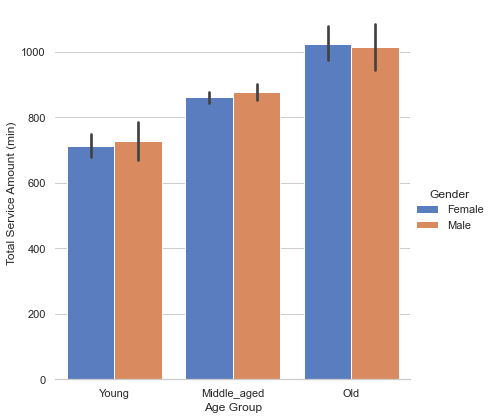

In [1001]:
sns.set(style="whitegrid")

g = sns.catplot(x="AgeGroup", y="ServiceAmt sum", hue="Gender", data=AlL_ClientData,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Total Service Amount (min)")
g.set_xlabels("Age Group")


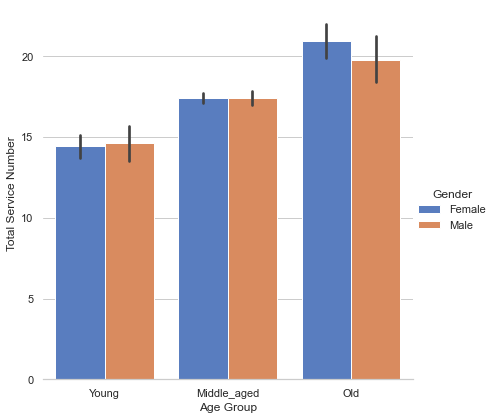

In [1002]:
sns.set(style="whitegrid")

g = sns.catplot(x="AgeGroup", y="ServiceNum Total", hue="Gender", data=AlL_ClientData,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Total Service Number")
g.set_xlabels("Age Group")

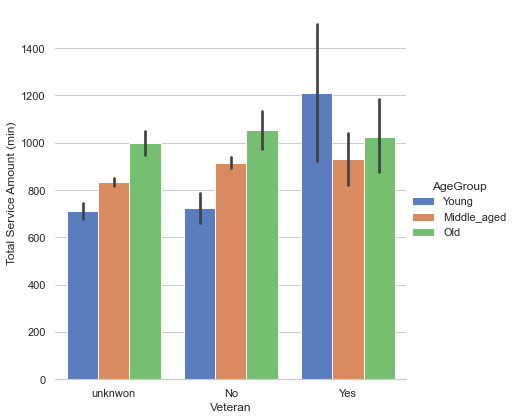

In [1003]:
sns.set(style="whitegrid")

g = sns.catplot(x="Veteran", y="ServiceAmt sum", hue="AgeGroup", data=AlL_ClientData,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Total Service Amount (min)")
g.set_xlabels("Veteran")

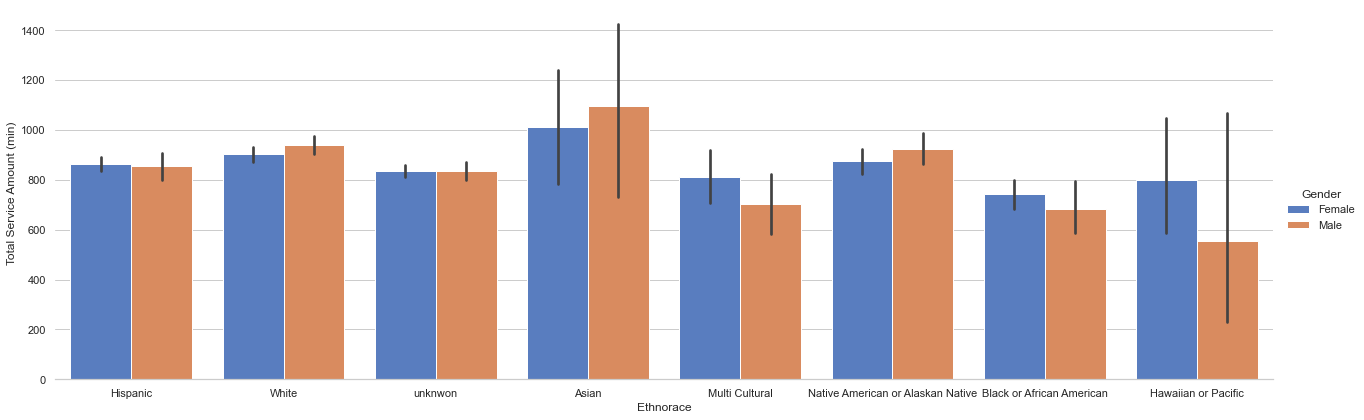

In [1004]:
sns.set(style="whitegrid")

g = sns.catplot(x="Ethnorace", y="ServiceAmt sum", hue="Gender", data=AlL_ClientData,
                height=6, aspect=3, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Total Service Amount (min)")
g.set_xlabels("Ethnorace")

In [1005]:
SurveyData_plotData = df_SurveyData.drop(['DOB','ClientId','SurveyDate','SurveyNumber','InterviewIntake','Gender','Ethnicity','Ethnorace','Veteran'], axis=1)


In [1006]:
SurveyData_plotData.head()

,Unnamed: 0,C1LivingSituationId,D2EducationLevelId,D3EmploymentSituationId,B1aAlcohol,B1cIllegalDrugs,C2AddictionStressProblemId,C4AddictionEmotionalProblemId,E1TimesArrested,E4CommitedCrime,F5aDepression,F5bAnxiety
0,12.0,41,12,3,0,0,5,5,0,0,5,5
1,13.0,3,12,7,0,0,5,5,1,1,30,1
2,16.0,41,10,3,0,0,5,5,0,0,0,0
3,17.0,41,10,7,29,1,4,4,0,1,30,30
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1007]:
SurveyData_plotData = SurveyData_plotData.astype(float) 


In [1008]:
SurveyData_plotData = SurveyData_plotData.dropna()

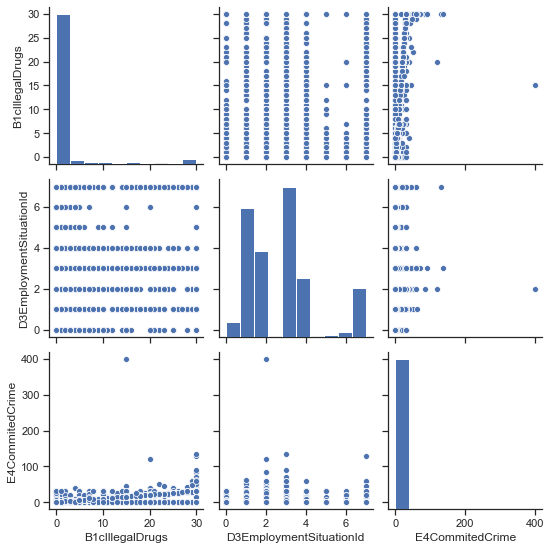

In [1009]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(SurveyData_plotData,vars=["B1cIllegalDrugs", "D3EmploymentSituationId",'E4CommitedCrime'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001720DE2EB20>,
      dtype=object)

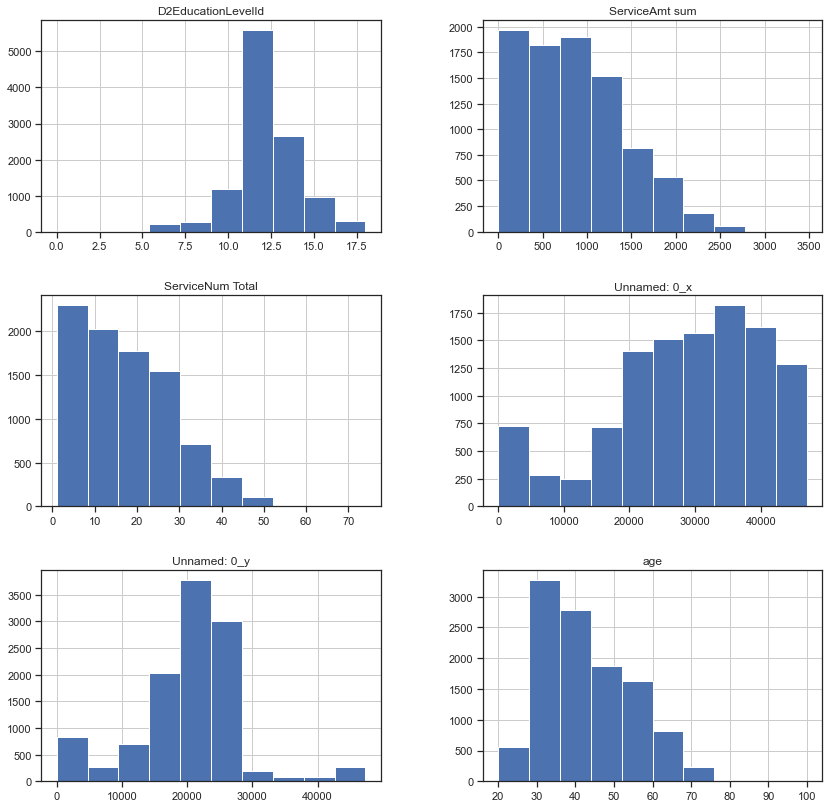

In [1010]:
AlL_ClientData.hist(figsize = (14,14))


In [1011]:
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(20,16))


<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

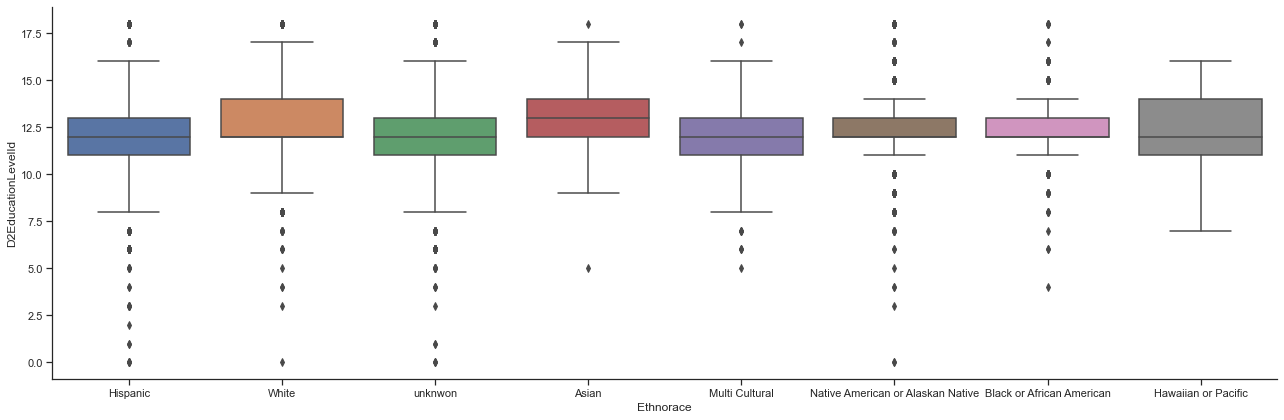

In [1012]:
sns.catplot(x="Ethnorace", y="D2EducationLevelId", kind="box",data=AlL_ClientData,height=6, aspect=3);


## Export Data for ML modling 

### Converting numerical data in Edu column to Categories

 Edu = {0: "Never attended", 1: "1st Grade", 2: "2nd Grade", 3: "3rd Grade", 4: "4th Grade", 5: "5th Grade", 6: "6th Grade", 7: "7th Grade", 8: "8th Grade", 
9: "9th Grade", 10: "10th Grade", 11: "11th Grade", 12: "12th Grade/High School Diploma/Equivalent", 13: "College or University / 1st Year Completed", 
14: "College or University / 2nd year completed (AA,AS)", 15: "College or University / 3rd Year completed", 16: "Bachelor's Degree (BA, BS) Or Higher", 
17: "Voc Tech Program after high school no diploma", 18: "Voc Tech Diploma after high school”}


In [1013]:
cleanup_nums2 = {"D2EducationLevelId":     {0: "< High School Education", 1: "< High School Education", 2: "< High School Education", 
                                            3: "< High School Education",4: "< High School Education", 5: "< High School Education", 
                                            6: "< High School Education", 7: "< High School Education", 8: "< High School Education", 
                                            9: "< High School Education",10: "High school or Diploma Education", 11: "High school or Diploma Education",
                                            12: "High school or Diploma Education" ,17: "High school or Diploma Education", 18: "High school or Diploma Education", 
                                            13: "College or University Education", 14: "College or University Education", 15: "College or University Education", 
                                            16: "Bachelor's Degree Or Higher"}}

AlL_ClientData.replace(cleanup_nums2, inplace=True)

In [1014]:
AlL_ClientData.head()

,Unnamed: 0_x,ClientId,Gender,Ethnicity,Ethnorace,Veteran,D2EducationLevelId,Unnamed: 0_y,City,State,Zip,ServiceAmt sum,ServiceNum Total,age,AgeGroup
0,13.0,37640,Female,Hispanic or Latino,Hispanic,unknwon,High school or Diploma Education,15.0,Bloomfield,NM,87413,NaN,NaN,28.0,Young
1,17.0,37648,Female,Not Hispanic or Latino,White,unknwon,High school or Diploma Education,18.0,Aztec,NM,87410,NaN,NaN,35.0,Middle_aged
2,19.0,37657,Female,Not Hispanic or Latino,White,unknwon,High school or Diploma Education,20.0,Alamogordo,NM,88310,NaN,NaN,50.0,Middle_aged
3,29.0,37690,Male,Hispanic or Latino,unknwon,unknwon,High school or Diploma Education,27.0,Albuquerque,NM,87151,NaN,NaN,28.0,Young
4,31.0,37692,Female,Hispanic or Latino,unknwon,unknwon,High school or Diploma Education,29.0,Alamogordo,NM,88310,NaN,NaN,62.0,Old


In [1015]:
AlL_ClientData.to_csv('AlL_ClientData.csv')

In [1016]:
df_SurveyData.head()

,Unnamed: 0,ClientId,SurveyDate,SurveyNumber,InterviewIntake,DOB,Gender,Ethnicity,Ethnorace,Veteran,...,D2EducationLevelId,D3EmploymentSituationId,B1aAlcohol,B1cIllegalDrugs,C2AddictionStressProblemId,C4AddictionEmotionalProblemId,E1TimesArrested,E4CommitedCrime,F5aDepression,F5bAnxiety
0,12.0,37640,2013-01-14,1.0,Intake,1992-01-14,Female,Hispanic or Latino,Hispanic,unknwon,...,12,3,0,0,5,5,0,0,5,5
1,13.0,37640,2014-10-28,2.0,Post,1992-01-14,Female,Hispanic or Latino,Hispanic,unknwon,...,12,7,0,0,5,5,1,1,30,1
2,16.0,37648,2013-01-14,1.0,Intake,1984-12-15,Female,Not Hispanic or Latino,White,unknwon,...,10,3,0,0,5,5,0,0,0,0
3,17.0,37648,2014-08-04,2.0,Post,1984-12-15,Female,Not Hispanic or Latino,White,unknwon,...,10,7,29,1,4,4,0,1,30,30
4,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,unknwon,unknwon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1017]:
from datetime import date
df_SurveyData['Date'] = pd.to_datetime(df_SurveyData.DOB)
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
    return age

df_SurveyData['age']= df_SurveyData['Date'].apply(lambda x: calculateAge(x))


In [1018]:
bins= [0,30,60,100]
labels = ['Young','Middle_aged','Old']
df_SurveyData['AgeGroup'] = pd.cut(df_SurveyData['age'], bins=bins, labels=labels, right=False)

In [1019]:
df_SurveyData = df_SurveyData.dropna()


In [1020]:
df_SurveyData['C1LivingSituationId'].value_counts()

41    16427
42     9117
3      1316
1      1118
45      827
43      522
2       454
44      413
46       53
Name: C1LivingSituationId, dtype: int64

In [1021]:
New2_SurveyData= df_SurveyData.drop_duplicates(subset=['ClientId'], keep='first')


In [1022]:
New1_SurveyData= df_SurveyData.drop_duplicates(subset=['ClientId'], keep='last')


In [1023]:
New1_SurveyData.InterviewIntake.describe()

count     11146
unique        2
top        Post
freq      10626
Name: InterviewIntake, dtype: object

In [1024]:
len(New1_SurveyData)

11146

In [1025]:
frames = [New1_SurveyData, New2_SurveyData]

New_SurveyData = pd.concat(frames)

In [1026]:
New_SurveyData.loc[New_SurveyData['ClientId'] == 37690]


,Unnamed: 0,ClientId,SurveyDate,SurveyNumber,InterviewIntake,DOB,Gender,Ethnicity,Ethnorace,Veteran,...,B1cIllegalDrugs,C2AddictionStressProblemId,C4AddictionEmotionalProblemId,E1TimesArrested,E4CommitedCrime,F5aDepression,F5bAnxiety,Date,age,AgeGroup
9,29.0,37690,2018-02-14,4.0,Post,1992-07-15,Male,Hispanic or Latino,unknwon,unknwon,...,0,5,5,0,0,6,14,1992-07-15,28.0,Young
6,26.0,37690,2013-01-16,1.0,Intake,1992-07-15,Male,Hispanic or Latino,unknwon,unknwon,...,4,1,1,0,4,30,30,1992-07-15,28.0,Young


In [1027]:
New_SurveyData['ClientId'].value_counts().mean()

2.0

In [1028]:
newdf_ServiceData['InterviewIntake']='Post'

In [1029]:
newdf_ServiceData.head()

,ClientId,ServiceAmt sum,ServiceNum Total,InterviewIntake
0,37914,1857.0,38,Post
1,38022,830.0,15,Post
2,38047,430.0,8,Post
3,38063,850.0,21,Post
4,38410,1870.0,41,Post


In [1030]:
New_SurveyData_update = pd.merge(New_SurveyData, newdf_ServiceData, on=['ClientId','InterviewIntake'],how='left')


In [1031]:
New_SurveyData_update.loc[New_SurveyData_update['InterviewIntake'] == 'Intake', 'ServiceNum Total'] = 0.0
New_SurveyData_update.loc[New_SurveyData_update['InterviewIntake'] == 'Intake', 'ServiceAmt sum'] = 0.0

In [1032]:
New_SurveyData_update.loc[New_SurveyData_update['InterviewIntake'] == 'Intake', 'ServiceNum Total']

9        0.0
13       0.0
23       0.0
45       0.0
59       0.0
        ... 
22286    0.0
22287    0.0
22288    0.0
22289    0.0
22291    0.0
Name: ServiceNum Total, Length: 11384, dtype: float64

In [1033]:
New_SurveyData_update['ServiceAmt sum'].isnull().sum()

2383

In [1034]:
New_SurveyData_update['ServiceNum Total'].isnull().sum()

2383

In [1035]:
len(New_SurveyData_update)

22292

In [1036]:
final_SurveyData = New_SurveyData_update.drop(['DOB','SurveyDate','SurveyNumber','age','Date'], axis=1)


### Converting numerical data to categori in employment situcation variable

In [1037]:
cleanup_nums = {"D3EmploymentSituationId":     {0: "Unemployed, Not looking for work", 1: "Employed", 2: "Employed", 3:"Unemployed, Looking for work", 4:"Unemployed, Not looking for work", 5:"Unemployed, Not looking for work", 6:"Unemployed, Not looking for work", 7:"Unemployed, Not looking for work"}}

final_SurveyData.replace(cleanup_nums, inplace=True)


In [1038]:
final_SurveyData['D3EmploymentSituationId'].describe()

count        22292
unique           3
top       Employed
freq          9658
Name: D3EmploymentSituationId, dtype: object

#### looking at frequency of categories in Employment Situation

In [1039]:
final_SurveyData['D3EmploymentSituationId'].value_counts()

Employed                            9658
Unemployed, Looking for work        7335
Unemployed, Not looking for work    5299
Name: D3EmploymentSituationId, dtype: int64

In [1040]:
final_SurveyData['ClientId'] = final_SurveyData['ClientId'].astype(str) 


In [1041]:
final_SurveyData['ClientId'].describe()

count             22292
unique            11146
top       3000000032741
freq                  2
Name: ClientId, dtype: object

In [1042]:
final_SurveyData.head()

,Unnamed: 0,ClientId,InterviewIntake,Gender,Ethnicity,Ethnorace,Veteran,C1LivingSituationId,D2EducationLevelId,D3EmploymentSituationId,...,B1cIllegalDrugs,C2AddictionStressProblemId,C4AddictionEmotionalProblemId,E1TimesArrested,E4CommitedCrime,F5aDepression,F5bAnxiety,AgeGroup,ServiceAmt sum,ServiceNum Total
0,13.0,37640,Post,Female,Hispanic or Latino,Hispanic,unknwon,3,12,"Unemployed, Not looking for work",...,0,5,5,1,1,30,1,Young,NaN,NaN
1,17.0,37648,Post,Female,Not Hispanic or Latino,White,unknwon,41,10,"Unemployed, Not looking for work",...,1,4,4,0,1,30,30,Middle_aged,NaN,NaN
2,19.0,37657,Post,Female,Not Hispanic or Latino,White,unknwon,41,12,Employed,...,0,1,1,0,0,0,0,Middle_aged,NaN,NaN
3,29.0,37690,Post,Male,Hispanic or Latino,unknwon,unknwon,41,12,"Unemployed, Not looking for work",...,0,5,5,0,0,6,14,Young,NaN,NaN
4,31.0,37692,Post,Female,Hispanic or Latino,unknwon,unknwon,41,11,"Unemployed, Not looking for work",...,0,5,5,0,0,0,0,Old,NaN,NaN


In [1043]:
final_SurveyData.to_csv('final_SurveyData.csv')

In [1044]:
Crime_varData =  final_SurveyData.drop(['C1LivingSituationId','D2EducationLevelId','D3EmploymentSituationId','B1aAlcohol','B1cIllegalDrugs','C2AddictionStressProblemId', 'C4AddictionEmotionalProblemId','E1TimesArrested','F5aDepression','F5bAnxiety'], axis=1)

In [1045]:
Crime_varData.dropna(subset = ["ServiceAmt sum"], inplace=True)
Crime_varData.dropna(subset = ["ServiceNum Total"], inplace=True)


In [1046]:
Crime_varData.head()

,Unnamed: 0,ClientId,InterviewIntake,Gender,Ethnicity,Ethnorace,Veteran,E4CommitedCrime,AgeGroup,ServiceAmt sum,ServiceNum Total
9,53.0,37758,Intake,Female,Hispanic or Latino,Hispanic,unknwon,0,Middle_aged,0.0,0.0
13,96.0,37853,Intake,Female,Not Hispanic or Latino,White,unknwon,0,Old,0.0,0.0
14,113.0,37914,Post,Female,Not Hispanic or Latino,White,unknwon,0,Middle_aged,1857.0,38.0
20,160.0,38022,Post,Female,Not Hispanic or Latino,White,unknwon,0,Middle_aged,830.0,15.0
22,173.0,38047,Post,Female,Not Hispanic or Latino,White,unknwon,0,Middle_aged,430.0,8.0


In [1047]:
Crime_varData.to_csv('Crime_varData.csv')

In [1048]:
Employment_varData =  final_SurveyData.drop(['C1LivingSituationId','D2EducationLevelId','E4CommitedCrime','B1aAlcohol','B1cIllegalDrugs','C2AddictionStressProblemId', 'C4AddictionEmotionalProblemId','E1TimesArrested','F5aDepression','F5bAnxiety'], axis=1)

In [1049]:
Employment_varData.dropna(subset = ["ServiceAmt sum"], inplace=True)
Employment_varData.dropna(subset = ["ServiceNum Total"], inplace=True)

In [1050]:
Employment_varData.head()

,Unnamed: 0,ClientId,InterviewIntake,Gender,Ethnicity,Ethnorace,Veteran,D3EmploymentSituationId,AgeGroup,ServiceAmt sum,ServiceNum Total
9,53.0,37758,Intake,Female,Hispanic or Latino,Hispanic,unknwon,"Unemployed, Looking for work",Middle_aged,0.0,0.0
13,96.0,37853,Intake,Female,Not Hispanic or Latino,White,unknwon,"Unemployed, Not looking for work",Old,0.0,0.0
14,113.0,37914,Post,Female,Not Hispanic or Latino,White,unknwon,Employed,Middle_aged,1857.0,38.0
20,160.0,38022,Post,Female,Not Hispanic or Latino,White,unknwon,Employed,Middle_aged,830.0,15.0
22,173.0,38047,Post,Female,Not Hispanic or Latino,White,unknwon,"Unemployed, Not looking for work",Middle_aged,430.0,8.0


In [1051]:
Employment_varData.to_csv('Employment_varData.csv')

In [1052]:
DrugUse_varData =  final_SurveyData.drop(['C1LivingSituationId','D2EducationLevelId','E4CommitedCrime','B1aAlcohol','D3EmploymentSituationId','C2AddictionStressProblemId', 'C4AddictionEmotionalProblemId','E1TimesArrested','F5aDepression','F5bAnxiety'], axis=1)

In [1053]:
DrugUse_varData.dropna(subset = ["ServiceAmt sum"], inplace=True)
DrugUse_varData.dropna(subset = ["ServiceNum Total"], inplace=True)

In [1054]:
DrugUse_varData.head()

,Unnamed: 0,ClientId,InterviewIntake,Gender,Ethnicity,Ethnorace,Veteran,B1cIllegalDrugs,AgeGroup,ServiceAmt sum,ServiceNum Total
9,53.0,37758,Intake,Female,Hispanic or Latino,Hispanic,unknwon,0,Middle_aged,0.0,0.0
13,96.0,37853,Intake,Female,Not Hispanic or Latino,White,unknwon,0,Old,0.0,0.0
14,113.0,37914,Post,Female,Not Hispanic or Latino,White,unknwon,0,Middle_aged,1857.0,38.0
20,160.0,38022,Post,Female,Not Hispanic or Latino,White,unknwon,0,Middle_aged,830.0,15.0
22,173.0,38047,Post,Female,Not Hispanic or Latino,White,unknwon,0,Middle_aged,430.0,8.0


In [1055]:
DrugUse_varData.to_csv('DrugUse_varData.csv')

### Power BI data visualization

Calculate difference Pre Post for IllegalDrugUsed and CommitedCrime

In [1056]:
DrugUse_varData.head()

,Unnamed: 0,ClientId,InterviewIntake,Gender,Ethnicity,Ethnorace,Veteran,B1cIllegalDrugs,AgeGroup,ServiceAmt sum,ServiceNum Total
9,53.0,37758,Intake,Female,Hispanic or Latino,Hispanic,unknwon,0,Middle_aged,0.0,0.0
13,96.0,37853,Intake,Female,Not Hispanic or Latino,White,unknwon,0,Old,0.0,0.0
14,113.0,37914,Post,Female,Not Hispanic or Latino,White,unknwon,0,Middle_aged,1857.0,38.0
20,160.0,38022,Post,Female,Not Hispanic or Latino,White,unknwon,0,Middle_aged,830.0,15.0
22,173.0,38047,Post,Female,Not Hispanic or Latino,White,unknwon,0,Middle_aged,430.0,8.0


In [1057]:
DrugUse_varData['InterviewIntake'].value_counts()

Intake    11384
Post       8525
Name: InterviewIntake, dtype: int64

In [1058]:
DrugUse_varData['InterviewIntake'].nunique()

2

In [1059]:
df2try = DrugUse_varData.groupby('ClientId').apply(lambda x: x['InterviewIntake'].unique())


In [1060]:
df3try = pd.DataFrame(df2try, columns = ['treatments']).reset_index()
df3try.head()

,ClientId,treatments
0,11000000030012,"[Post, Intake]"
1,11000000030015,"[Post, Intake]"
2,11000000030017,"[Post, Intake]"
3,11000000030027,"[Post, Intake]"
4,11000000030029,[Intake]


In [1061]:
df3try['treatments'].value_counts()

[Intake]          2715
[Post]             186
[Post, Intake]       1
[Post, Intake]       1
[Post, Intake]       1
                  ... 
[Post, Intake]       1
[Post, Intake]       1
[Post, Intake]       1
[Post, Intake]       1
[Post, Intake]       1
Name: treatments, Length: 8155, dtype: int64

In [1062]:
bm = df3try['treatments'].apply(lambda x: len(x)==2)

In [1063]:
df4try = df3try[bm]

In [1064]:
df4try.describe()

,ClientId,treatments
count,8153,8153
unique,8153,8153
top,3000000032741,"[Post, Intake]"
freq,1,1


In [1065]:
df4try.shape

(8153, 2)

In [1066]:
newdf = pd.merge(DrugUse_varData, df4try, how='inner', on = 'ClientId')


In [1067]:

newdf.head()

,Unnamed: 0,ClientId,InterviewIntake,Gender,Ethnicity,Ethnorace,Veteran,B1cIllegalDrugs,AgeGroup,ServiceAmt sum,ServiceNum Total,treatments
0,113.0,37914,Post,Female,Not Hispanic or Latino,White,unknwon,0,Middle_aged,1857.0,38.0,"[Post, Intake]"
1,111.0,37914,Intake,Female,Not Hispanic or Latino,White,unknwon,0,Middle_aged,0.0,0.0,"[Post, Intake]"
2,160.0,38022,Post,Female,Not Hispanic or Latino,White,unknwon,0,Middle_aged,830.0,15.0,"[Post, Intake]"
3,157.0,38022,Intake,Female,Not Hispanic or Latino,White,unknwon,0,Middle_aged,0.0,0.0,"[Post, Intake]"
4,173.0,38047,Post,Female,Not Hispanic or Latino,White,unknwon,0,Middle_aged,430.0,8.0,"[Post, Intake]"


In [1068]:
newdf['InterviewIntake'].value_counts()

Intake    8153
Post      8153
Name: InterviewIntake, dtype: int64

In [1069]:

DrugUse_varData2 = newdf.pivot('ClientId','InterviewIntake','B1cIllegalDrugs').add_prefix('DrugUsed')

DrugUse_varData2['DrugUsedDiff'] = DrugUse_varData2['DrugUsedPost'].sub(DrugUse_varData2['DrugUsedIntake'])

DrugUse_varData2['ServiceAmt sum'] = newdf.drop_duplicates('ClientId').set_index('ClientId')['ServiceAmt sum']
DrugUse_varData2['Gender'] = newdf.drop_duplicates('ClientId').set_index('ClientId')['Gender']
DrugUse_varData2['Ethnicity'] = newdf.drop_duplicates('ClientId').set_index('ClientId')['Ethnicity']
DrugUse_varData2['Ethnorace'] = newdf.drop_duplicates('ClientId').set_index('ClientId')['Ethnorace']
DrugUse_varData2['Veteran'] = newdf.drop_duplicates('ClientId').set_index('ClientId')['Veteran']
DrugUse_varData2['AgeGroup'] = newdf.drop_duplicates('ClientId').set_index('ClientId')['AgeGroup']

DrugUse_varData2 = DrugUse_varData2.reset_index().rename_axis(None, axis=1)

In [1070]:
DrugUse_varData2.head()

,ClientId,DrugUsedIntake,DrugUsedPost,DrugUsedDiff,ServiceAmt sum,Gender,Ethnicity,Ethnorace,Veteran,AgeGroup
0,11000000030012,0,0,0,850.0,Female,Not Hispanic or Latino,White,No,Middle_aged
1,11000000030015,10,5,-5,150.0,Male,Hispanic or Latino,unknwon,No,Middle_aged
2,11000000030017,0,0,0,1101.0,Female,Not Hispanic or Latino,White,No,Old
3,11000000030027,0,0,0,550.0,Female,Not Hispanic or Latino,unknwon,No,Middle_aged
4,11000000030030,0,0,0,850.0,Female,Hispanic or Latino,unknwon,No,Middle_aged


In [1071]:
DrugUse_varData2[DrugUse_varData2['ClientId'] =='37914']

,ClientId,DrugUsedIntake,DrugUsedPost,DrugUsedDiff,ServiceAmt sum,Gender,Ethnicity,Ethnorace,Veteran,AgeGroup
6531,37914,0,0,0,1857.0,Female,Not Hispanic or Latino,White,unknwon,Middle_aged


# new dataframe  for all 3 target variable

In [1072]:
final_SurveyData['InterviewIntake'].value_counts()

Intake    11384
Post      10908
Name: InterviewIntake, dtype: int64

In [1073]:
NewFinalData = final_SurveyData.groupby('ClientId').apply(lambda x: x['InterviewIntake'].unique())


In [1074]:
NewFinalData1 = pd.DataFrame(NewFinalData, columns = ['treatments']).reset_index()


In [1075]:
bm = NewFinalData1['treatments'].apply(lambda x: len(x)==2)

In [1076]:
NewFinalData2 = NewFinalData1[bm]

In [1077]:
NewFinalData2['treatments'].value_counts()

[Post, Intake]    1
[Post, Intake]    1
[Post, Intake]    1
[Post, Intake]    1
[Post, Intake]    1
                 ..
[Post, Intake]    1
[Post, Intake]    1
[Post, Intake]    1
[Post, Intake]    1
[Post, Intake]    1
Name: treatments, Length: 10352, dtype: int64

In [1078]:
final_SurveyDataUpdated = pd.merge(final_SurveyData, NewFinalData2, how='inner', on = 'ClientId')


In [1079]:
final_SurveyDataUpdated['InterviewIntake'].value_counts()

Intake    10352
Post      10352
Name: InterviewIntake, dtype: int64

In [1080]:
final_SurveyDataUpdated.head()

,Unnamed: 0,ClientId,InterviewIntake,Gender,Ethnicity,Ethnorace,Veteran,C1LivingSituationId,D2EducationLevelId,D3EmploymentSituationId,...,C2AddictionStressProblemId,C4AddictionEmotionalProblemId,E1TimesArrested,E4CommitedCrime,F5aDepression,F5bAnxiety,AgeGroup,ServiceAmt sum,ServiceNum Total,treatments
0,13.0,37640,Post,Female,Hispanic or Latino,Hispanic,unknwon,3,12,"Unemployed, Not looking for work",...,5,5,1,1,30,1,Young,NaN,NaN,"[Post, Intake]"
1,12.0,37640,Intake,Female,Hispanic or Latino,Hispanic,unknwon,41,12,"Unemployed, Looking for work",...,5,5,0,0,5,5,Young,0.0,0.0,"[Post, Intake]"
2,17.0,37648,Post,Female,Not Hispanic or Latino,White,unknwon,41,10,"Unemployed, Not looking for work",...,4,4,0,1,30,30,Middle_aged,NaN,NaN,"[Post, Intake]"
3,16.0,37648,Intake,Female,Not Hispanic or Latino,White,unknwon,41,10,"Unemployed, Looking for work",...,5,5,0,0,0,0,Middle_aged,0.0,0.0,"[Post, Intake]"
4,29.0,37690,Post,Male,Hispanic or Latino,unknwon,unknwon,41,12,"Unemployed, Not looking for work",...,5,5,0,0,6,14,Young,NaN,NaN,"[Post, Intake]"


In [1081]:
final_SurveyDataUpdated['InterviewIntake'].value_counts()

Intake    10352
Post      10352
Name: InterviewIntake, dtype: int64

In [1108]:

FinalData_TargetVar = final_SurveyDataUpdated.pivot('ClientId','InterviewIntake','E4CommitedCrime').add_prefix('CommitedCrime')

FinalData_TargetVar['CommitedCrimeDiff'] = FinalData_TargetVar['CommitedCrimePost'].sub(FinalData_TargetVar['CommitedCrimeIntake'])

FinalData_TargetVar['ServiceAmt sum'] = final_SurveyDataUpdated.drop_duplicates('ClientId').set_index('ClientId')['ServiceAmt sum']
FinalData_TargetVar['Gender'] = final_SurveyDataUpdated.drop_duplicates('ClientId').set_index('ClientId')['Gender']
FinalData_TargetVar['Ethnicity'] = final_SurveyDataUpdated.drop_duplicates('ClientId').set_index('ClientId')['Ethnicity']
FinalData_TargetVar['Ethnorace'] = final_SurveyDataUpdated.drop_duplicates('ClientId').set_index('ClientId')['Ethnorace']
FinalData_TargetVar['Veteran'] = final_SurveyDataUpdated.drop_duplicates('ClientId').set_index('ClientId')['Veteran']
FinalData_TargetVar['AgeGroup'] = final_SurveyDataUpdated.drop_duplicates('ClientId').set_index('ClientId')['AgeGroup']

FinalData_TargetVar = FinalData_TargetVar.reset_index().rename_axis(None, axis=1)

In [1109]:
FinalData_TargetVar.head()

,ClientId,CommitedCrimeIntake,CommitedCrimePost,CommitedCrimeDiff,ServiceAmt sum,Gender,Ethnicity,Ethnorace,Veteran,AgeGroup
0,11000000030012,0,0,0,850.0,Female,Not Hispanic or Latino,White,No,Middle_aged
1,11000000030015,0,0,0,150.0,Male,Hispanic or Latino,unknwon,No,Middle_aged
2,11000000030017,0,0,0,1101.0,Female,Not Hispanic or Latino,White,No,Old
3,11000000030027,0,0,0,550.0,Female,Not Hispanic or Latino,unknwon,No,Middle_aged
4,11000000030029,0,NaN,NaN,0.0,Male,Hispanic or Latino,Hispanic,No,Middle_aged


In [1113]:
FinalData_TargetVar.dropna(subset = ["CommitedCrimeDiff"], inplace=True)


In [1114]:
FinalData_TargetVar.head()

,ClientId,CommitedCrimeIntake,CommitedCrimePost,CommitedCrimeDiff,ServiceAmt sum,Gender,Ethnicity,Ethnorace,Veteran,AgeGroup
0,11000000030012,0,0,0,850.0,Female,Not Hispanic or Latino,White,No,Middle_aged
1,11000000030015,0,0,0,150.0,Male,Hispanic or Latino,unknwon,No,Middle_aged
2,11000000030017,0,0,0,1101.0,Female,Not Hispanic or Latino,White,No,Old
3,11000000030027,0,0,0,550.0,Female,Not Hispanic or Latino,unknwon,No,Middle_aged
5,11000000030030,0,0,0,850.0,Female,Hispanic or Latino,unknwon,No,Middle_aged


In [1124]:
FinalData_TargetVar[FinalData_TargetVar['CommitedCrimeDiff']<-30] 

,ClientId,CommitedCrimeIntake,CommitedCrimePost,CommitedCrimeDiff,ServiceAmt sum,Gender,Ethnicity,Ethnorace,Veteran,AgeGroup
1853,17000000030337,31,0,-31,1768.0,Male,Hispanic or Latino,unknwon,No,Middle_aged
2047,17000000031270,50,0,-50,875.0,Female,Not Hispanic or Latino,White,No,Middle_aged
2085,17000000031437,31,0,-31,1029.0,Female,Hispanic or Latino,Hispanic,No,Middle_aged
2187,17000000031909,61,0,-61,384.0,Male,Hispanic or Latino,unknwon,No,Young
2300,17000000032497,31,0,-31,388.0,Female,Not Hispanic or Latino,Native American or Alaskan Native,No,Middle_aged
2449,17000000033192,32,0,-32,1135.0,Female,Not Hispanic or Latino,White,No,Young
2595,17000000033811,40,0,-40,73.0,Male,Not Hispanic or Latino,White,No,Middle_aged
2682,17000000034133,120,0,-120,1401.0,Female,Not Hispanic or Latino,Black or African American,No,Middle_aged
2781,17000000034549,31,0,-31,1164.0,Male,Hispanic or Latino,Hispanic,No,Middle_aged
2905,17000000035209,48,0,-48,730.0,Female,Not Hispanic or Latino,Black or African American,unknwon,Middle_aged


In [1090]:
final_SurveyDataUpdated.dropna(subset = ["ServiceAmt sum"], inplace=True)

In [1104]:
final_SurveyDataUpdated1 = pd.merge(final_SurveyDataUpdated, df4try, how='inner', on = 'ClientId')


In [1105]:
final_SurveyDataUpdated1['InterviewIntake'].value_counts()

Intake    8153
Post      8153
Name: InterviewIntake, dtype: int64

In [1106]:
final_SurveyData_lastUpdate=  final_SurveyDataUpdated1.drop(['C1LivingSituationId','D2EducationLevelId','B1aAlcohol','C2AddictionStressProblemId', 'C4AddictionEmotionalProblemId','E1TimesArrested','F5aDepression','F5bAnxiety'], axis=1)

In [1123]:
final_SurveyData_lastUpdate.head()

,Unnamed: 0,ClientId,InterviewIntake,Gender,Ethnicity,Ethnorace,Veteran,D3EmploymentSituationId,B1cIllegalDrugs,E4CommitedCrime,AgeGroup,ServiceAmt sum,ServiceNum Total,treatments_x,treatments_y
0,113.0,37914,Post,Female,Not Hispanic or Latino,White,unknwon,Employed,0,0,Middle_aged,1857.0,38.0,"[Post, Intake]","[Post, Intake]"
1,111.0,37914,Intake,Female,Not Hispanic or Latino,White,unknwon,Employed,0,0,Middle_aged,0.0,0.0,"[Post, Intake]","[Post, Intake]"
2,160.0,38022,Post,Female,Not Hispanic or Latino,White,unknwon,Employed,0,0,Middle_aged,830.0,15.0,"[Post, Intake]","[Post, Intake]"
3,157.0,38022,Intake,Female,Not Hispanic or Latino,White,unknwon,"Unemployed, Not looking for work",0,0,Middle_aged,0.0,0.0,"[Post, Intake]","[Post, Intake]"
4,173.0,38047,Post,Female,Not Hispanic or Latino,White,unknwon,"Unemployed, Not looking for work",0,0,Middle_aged,430.0,8.0,"[Post, Intake]","[Post, Intake]"


In [1107]:
final_SurveyData_lastUpdate.to_csv('final_SurveyData_lastUpdate.csv')

In [1091]:
Employment_varData2=  final_SurveyDataUpdated.drop(['C1LivingSituationId','D2EducationLevelId','E4CommitedCrime','B1aAlcohol','B1cIllegalDrugs','C2AddictionStressProblemId', 'C4AddictionEmotionalProblemId','E1TimesArrested','F5aDepression','F5bAnxiety'], axis=1)

In [1093]:
Employment_varData2.head()

,Unnamed: 0,ClientId,InterviewIntake,Gender,Ethnicity,Ethnorace,Veteran,D3EmploymentSituationId,AgeGroup,ServiceAmt sum,ServiceNum Total,treatments
1,12.0,37640,Intake,Female,Hispanic or Latino,Hispanic,unknwon,"Unemployed, Looking for work",Young,0.0,0.0,"[Post, Intake]"
3,16.0,37648,Intake,Female,Not Hispanic or Latino,White,unknwon,"Unemployed, Looking for work",Middle_aged,0.0,0.0,"[Post, Intake]"
5,26.0,37690,Intake,Male,Hispanic or Latino,unknwon,unknwon,"Unemployed, Not looking for work",Young,0.0,0.0,"[Post, Intake]"
7,30.0,37692,Intake,Female,Hispanic or Latino,unknwon,unknwon,"Unemployed, Not looking for work",Old,0.0,0.0,"[Post, Intake]"
9,33.0,37706,Intake,Female,Not Hispanic or Latino,Asian,unknwon,Employed,Middle_aged,0.0,0.0,"[Post, Intake]"


In [1099]:
Employment_varData3 = pd.merge(Employment_varData2, df4try, how='inner', on = 'ClientId')


In [1100]:
Employment_varData3['InterviewIntake'].value_counts()

Intake    8153
Post      8153
Name: InterviewIntake, dtype: int64

In [1102]:
Employment_varData3.head()

,Unnamed: 0,ClientId,InterviewIntake,Gender,Ethnicity,Ethnorace,Veteran,D3EmploymentSituationId,AgeGroup,ServiceAmt sum,ServiceNum Total,treatments_x,treatments_y
0,113.0,37914,Post,Female,Not Hispanic or Latino,White,unknwon,Employed,Middle_aged,1857.0,38.0,"[Post, Intake]","[Post, Intake]"
1,111.0,37914,Intake,Female,Not Hispanic or Latino,White,unknwon,Employed,Middle_aged,0.0,0.0,"[Post, Intake]","[Post, Intake]"
2,160.0,38022,Post,Female,Not Hispanic or Latino,White,unknwon,Employed,Middle_aged,830.0,15.0,"[Post, Intake]","[Post, Intake]"
3,157.0,38022,Intake,Female,Not Hispanic or Latino,White,unknwon,"Unemployed, Not looking for work",Middle_aged,0.0,0.0,"[Post, Intake]","[Post, Intake]"
4,173.0,38047,Post,Female,Not Hispanic or Latino,White,unknwon,"Unemployed, Not looking for work",Middle_aged,430.0,8.0,"[Post, Intake]","[Post, Intake]"


In [1120]:

NewEmployment_varData3 = Employment_varData3.pivot('ClientId','InterviewIntake','D3EmploymentSituationId').add_prefix('employmentStatus')


NewEmployment_varData3['ServiceAmt sum'] = Employment_varData3.drop_duplicates('ClientId').set_index('ClientId')['ServiceAmt sum']
NewEmployment_varData3['Gender'] = Employment_varData3.drop_duplicates('ClientId').set_index('ClientId')['Gender']
NewEmployment_varData3['Ethnicity'] = Employment_varData3.drop_duplicates('ClientId').set_index('ClientId')['Ethnicity']
NewEmployment_varData3['Ethnorace'] = Employment_varData3.drop_duplicates('ClientId').set_index('ClientId')['Ethnorace']
NewEmployment_varData3['Veteran'] = Employment_varData3.drop_duplicates('ClientId').set_index('ClientId')['Veteran']
NewEmployment_varData3['AgeGroup'] = Employment_varData3.drop_duplicates('ClientId').set_index('ClientId')['AgeGroup']

NewEmployment_varData3 = NewEmployment_varData3.reset_index().rename_axis(None, axis=1)

In [1121]:
NewEmployment_varData3.head()

,ClientId,employmentStatusIntake,employmentStatusPost,ServiceAmt sum,Gender,Ethnicity,Ethnorace,Veteran,AgeGroup
0,11000000030012,Employed,Employed,850.0,Female,Not Hispanic or Latino,White,No,Middle_aged
1,11000000030015,"Unemployed, Not looking for work","Unemployed, Looking for work",150.0,Male,Hispanic or Latino,unknwon,No,Middle_aged
2,11000000030017,"Unemployed, Looking for work",Employed,1101.0,Female,Not Hispanic or Latino,White,No,Old
3,11000000030027,Employed,"Unemployed, Looking for work",550.0,Female,Not Hispanic or Latino,unknwon,No,Middle_aged
4,11000000030030,Employed,Employed,850.0,Female,Hispanic or Latino,unknwon,No,Middle_aged


In [1138]:
LastEmployment_varData3 = NewEmployment_varData3[NewEmployment_varData3['employmentStatusIntake'] == 'Unemployed, Looking for work'] 


In [1147]:

Employment_varData5= Employment_varData3[Employment_varData3['ClientId'].isin(LastEmployment_varData3['ClientId'])]


In [1149]:
Employment_varData5.head()

,Unnamed: 0,ClientId,InterviewIntake,Gender,Ethnicity,Ethnorace,Veteran,D3EmploymentSituationId,AgeGroup,ServiceAmt sum,ServiceNum Total,treatments_x,treatments_y
4,173.0,38047,Post,Female,Not Hispanic or Latino,White,unknwon,"Unemployed, Not looking for work",Middle_aged,430.0,8.0,"[Post, Intake]","[Post, Intake]"
5,170.0,38047,Intake,Female,Not Hispanic or Latino,White,unknwon,"Unemployed, Looking for work",Middle_aged,0.0,0.0,"[Post, Intake]","[Post, Intake]"
10,452.0,38520,Post,Female,Not Hispanic or Latino,White,unknwon,"Unemployed, Not looking for work",Young,554.0,9.0,"[Post, Intake]","[Post, Intake]"
11,449.0,38520,Intake,Female,Not Hispanic or Latino,White,unknwon,"Unemployed, Looking for work",Young,0.0,0.0,"[Post, Intake]","[Post, Intake]"
12,485.0,38595,Post,Female,Not Hispanic or Latino,Black or African American,unknwon,"Unemployed, Not looking for work",Middle_aged,1351.0,33.0,"[Post, Intake]","[Post, Intake]"


In [1151]:
Employment_varData5['ClientId'].value_counts()

9000000037582     2
17000000031418    2
3000000036918     2
25000000044127    2
17000000041054    2
                 ..
9000000048028     2
17000000036457    2
9000000030314     2
17000000030547    2
3000000034529     2
Name: ClientId, Length: 3359, dtype: int64

In [1126]:
LastEmployment_varData3.head()

,ClientId,employmentStatusIntake,employmentStatusPost,ServiceAmt sum,Gender,Ethnicity,Ethnorace,Veteran,AgeGroup
2,11000000030017,"Unemployed, Looking for work",Employed,1101.0,Female,Not Hispanic or Latino,White,No,Old
5,11000000030032,"Unemployed, Looking for work","Unemployed, Not looking for work",150.0,Female,Hispanic or Latino,unknwon,No,Middle_aged
6,11000000030033,"Unemployed, Looking for work",Employed,1172.0,Female,Hispanic or Latino,unknwon,No,Middle_aged
7,11000000030039,"Unemployed, Looking for work",Employed,395.0,Female,Hispanic or Latino,unknwon,No,Young
9,11000000030050,"Unemployed, Looking for work","Unemployed, Looking for work",390.0,Female,Not Hispanic or Latino,White,No,Middle_aged


In [1150]:
LastEmployment_varData3['ClientId'].value_counts()

9000000037582     1
23000000047263    1
3000000036305     1
11000000034608    1
17000000034545    1
                 ..
9000000034939     1
16000000039260    1
17000000036992    1
17000000030990    1
3000000042687     1
Name: ClientId, Length: 3359, dtype: int64

In [1127]:
LastEmployment_varData3.to_csv('Employment_varData4.csv')

In [1152]:
Employment_varData5.to_csv('Employment_varData5.csv')

In [1103]:
Employment_varData3.to_csv('Employment_varData2.csv')

In [1122]:
NewEmployment_varData3.to_csv('Employment_varData3.csv')

#  summary statistics 

In [140]:
AlL_ClientData.agg({'D2EducationLevelId': ['min', 'max', 'median', 'mean','sem'],'ServiceAmt sum': ['min', 'max', 'median', 'mean','sem'],
                   'ServiceNum Total': ['min', 'max', 'median', 'mean','sem'],'age': ['min', 'max', 'median', 'mean','sem']})

ValueError: no results

In [ ]:
AlL_ClientData['Ethnorace'].value_counts()


In [ ]:
AlL_ClientData['Veteran'].value_counts()


In [ ]:
AlL_ClientData['Gender'].value_counts()


In [141]:
final_SurveyData.agg({'E4CommitedCrime': ['min', 'max', 'median', 'mean','sem'],'D3EmploymentSituationId': ['min', 'max', 'median', 'mean','sem'],
                   'B1cIllegalDrugs': ['min', 'max', 'median', 'mean','sem']})


,E4CommitedCrime,D3EmploymentSituationId,B1cIllegalDrugs
max,400.000000,"Unemployed, retired",30.000000
mean,2.122286,NaN,2.248430
median,0.000000,NaN,0.000000
min,0.000000,Employed full time,0.000000
sem,0.049014,NaN,0.045057


# # T test On Target Variebles

In [343]:
final_SurveyData.head()

,InterviewIntake,Gender,Ethnicity,Ethnorace,Veteran,C1LivingSituationId,D2EducationLevelId,D3EmploymentSituationId,B1aAlcohol,B1cIllegalDrugs,C2AddictionStressProblemId,C4AddictionEmotionalProblemId,E1TimesArrested,E4CommitedCrime,F5aDepression,F5bAnxiety,AgeGroup,ServiceAmt sum,ServiceNum Total
0,Post,Female,Hispanic or Latino,Hispanic,unknwon,3,12,7,0,0,5,5,1,1,30,1,Young,NaN,NaN
1,Post,Female,Not Hispanic or Latino,White,unknwon,41,10,7,29,1,4,4,0,1,30,30,Middle_aged,NaN,NaN
2,Post,Female,Not Hispanic or Latino,White,unknwon,41,12,1,2,0,1,1,0,0,0,0,Middle_aged,NaN,NaN
3,Post,Male,Hispanic or Latino,unknwon,unknwon,41,12,7,0,0,5,5,0,0,6,14,Young,NaN,NaN
4,Post,Female,Hispanic or Latino,unknwon,unknwon,41,11,4,0,0,5,5,0,0,0,0,Old,NaN,NaN


### Getting mean,count,std of target variables

In [344]:
final_SurveyData['B1cIllegalDrugs'] = final_SurveyData['B1cIllegalDrugs'].astype(float)


In [345]:
final_SurveyData.groupby('InterviewIntake').B1cIllegalDrugs.agg({'mean':'mean','count':'count','stadard err':'sem'})

C:\Users\shafa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,mean,count,stadard err
InterviewIntake,,,
Intake,3.200018,11384,0.07331
Post,1.255317,10908,0.04948


In [346]:
final_SurveyData['D3EmploymentSituationId'] = final_SurveyData['D3EmploymentSituationId'].astype(float)


In [347]:
final_SurveyData.groupby('InterviewIntake').D3EmploymentSituationId.agg({'mean':'mean','count':'count','stadard err':'sem'})

C:\Users\shafa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,mean,count,stadard err
InterviewIntake,,,
Intake,2.792867,11384,0.015900
Post,2.670975,10908,0.017536


In [348]:
final_SurveyData['E4CommitedCrime'] = final_SurveyData['E4CommitedCrime'].astype(float)


In [349]:
final_SurveyData.groupby('InterviewIntake').E4CommitedCrime.agg({'mean':'mean','count':'count','stadard err':'sem'})

C:\Users\shafa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,mean,count,stadard err
InterviewIntake,,,
Intake,2.985506,11384,0.074198
Post,1.221397,10908,0.062386


In [350]:
final_SurveyData.groupby(["InterviewIntake"])["E4CommitedCrime"].count()


InterviewIntake
Intake    11384
Post      10908
Name: E4CommitedCrime, dtype: int64

In [351]:
drug_Used_Intake = final_SurveyData.loc[final_SurveyData['InterviewIntake'] == 'Intake', 'B1cIllegalDrugs']
drug_Used_Post = final_SurveyData.loc[final_SurveyData['InterviewIntake'] == 'Post', 'B1cIllegalDrugs']

EmploymentSituation_Intake = final_SurveyData.loc[final_SurveyData['InterviewIntake'] == 'Intake', 'D3EmploymentSituationId']
EmploymentSituation_Post = final_SurveyData.loc[final_SurveyData['InterviewIntake'] == 'Post', 'D3EmploymentSituationId']

CommitedCrime_Intake = final_SurveyData.loc[final_SurveyData['InterviewIntake'] == 'Intake', 'E4CommitedCrime']
CommitedCrime_Post = final_SurveyData.loc[final_SurveyData['InterviewIntake'] == 'Post', 'E4CommitedCrime']


### t test for drug use in 30 days

In [352]:
from scipy import stats as st
from statsmodels.stats.weightstats import ttest_ind

In [353]:
ttest1= ttest_ind(drug_Used_Intake,drug_Used_Post)

In [354]:
ttest1

(21.80405591990353, 2.613033094265204e-104, 22290.0)

### t test for employment Situation in 30 days

In [355]:
ttest2= ttest_ind(EmploymentSituation_Intake,EmploymentSituation_Post)

In [356]:
ttest2

(5.157732025121648, 2.520974112076615e-07, 22290.0)

### t test for crime commited in 30 days

In [357]:
ttest3= ttest_ind(CommitedCrime_Intake,CommitedCrime_Post)

In [358]:
ttest3

(18.123448421525264, 6.948798930120578e-73, 22290.0)